### 1. Identify the most isolated location’s Location Id
### 2.  Identify the most isolated location’s Location Id for each country

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [24]:
data = pd.read_csv("locations.csv")

In [25]:
data.head()

,Country,Longitude,Latitude,LocationId
0,AD,1.53,42.51,1
1,AE,55.47,25.42,2
2,AE,55.47,25.39,3
3,AE,54.38,24.48,4
4,AE,54.54,24.51,5


In [26]:
data.tail()

,Country,Longitude,Latitude,LocationId
25595,VN,106.70,10.78,25596
25596,VN,106.71,10.72,25597
25597,ZA,28.04,-26.15,25598
25598,ZA,28.28,-25.79,25599
25599,ZA,28.11,-26.02,25600


In [27]:
data.describe()

,Longitude,Latitude,LocationId
count,25599.000000,25599.000000,25600.000000
mean,-27.872234,34.793016,12800.500000
std,96.844046,13.342332,7390.227782
min,-159.460000,-46.410000,1.000000
25%,-104.665000,31.240000,6400.750000
50%,-79.350000,36.750000,12800.500000
75%,100.630000,41.570000,19200.250000
max,176.920000,64.850000,25600.000000


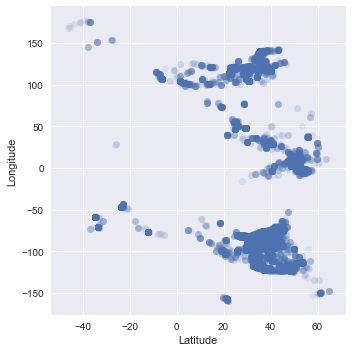

In [28]:
sns.lmplot(x='Latitude', y='Longitude', data = data,fit_reg=False,scatter_kws={'alpha':.1})

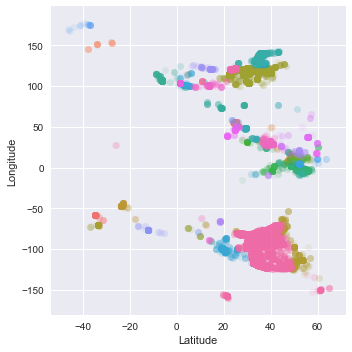

In [29]:
sns.lmplot(x='Latitude', y='Longitude', data = data, fit_reg=False,hue='Country',legend=False,scatter_kws={'alpha':.1})

In [30]:
data.apply(pd.notnull).all(axis=0)

Country        True
Longitude     False
Latitude      False
LocationId     True
dtype: bool

Both Longitude and Latitude have NAs or nulls in them

In [31]:
data.dropna(inplace= True)

In [32]:
data.reset_index(inplace=True)

In [33]:
data.apply(pd.notnull).all(axis=0)

index         True
Country       True
Longitude     True
Latitude      True
LocationId    True
dtype: bool

In [47]:
x = np.array(data.Longitude[:10].astype(np.float16))
y = np.array(data.Latitude[:10].astype(np.float16))

# take advantage of broadcasting, to make a 2dim array of diffs
dx = x[:, np.newaxis] - x[np.newaxis,:]
dy = y[:, np.newaxis] - y[np.newaxis,:]

In [48]:
# stack in one array, to speed up calculations
d = np.array([dx,dy])

out = (d**2).sum(axis=0)**0.5

In [49]:
out = pd.DataFrame(out)

In [59]:
out

,0,1,2,3,4,5,6,7,8,9
0,-0.00000,-56.593750,-56.593750,-55.812500,-55.968750,-55.968750,-55.968750,-56.062500,-57.156250,-55.812500
1,-56.59375,-0.000000,-0.031250,-1.440430,-1.303711,-1.403320,-1.403320,-1.285156,-1.253906,-1.440430
2,-56.59375,-0.031250,-0.000000,-1.420898,-1.282227,-1.380859,-1.380859,-1.261719,-1.222656,-1.420898
3,-55.81250,-1.440430,-1.420898,-0.000000,-0.159302,-0.147461,-0.147461,-0.251953,-1.345703,-0.000000
4,-55.96875,-1.303711,-1.282227,-0.159302,-0.000000,-0.113770,-0.113770,-0.112671,-1.202148,-0.159302
5,-55.96875,-1.403320,-1.380859,-0.147461,-0.113770,-0.000000,-0.000000,-0.133545,-1.207031,-0.147461
6,-55.96875,-1.403320,-1.380859,-0.147461,-0.113770,-0.000000,-0.000000,-0.133545,-1.207031,-0.147461
7,-56.06250,-1.285156,-1.261719,-0.251953,-0.112671,-0.133545,-0.133545,-0.000000,-1.094727,-0.251953
8,-57.15625,-1.253906,-1.222656,-1.345703,-1.202148,-1.207031,-1.207031,-1.094727,-0.000000,-1.345703
9,-55.81250,-1.440430,-1.420898,-0.000000,-0.159302,-0.147461,-0.147461,-0.251953,-1.345703,-0.000000


In [63]:
np.fill_diagonal(out,100)

AttributeError: 'DataFrame' object has no attribute 'flat'

In [60]:
out.fill_diagonal(100)

AttributeError: 'DataFrame' object has no attribute 'fill_diagonal'

In [ ]:
g = out.iloc[24,]
g.sort_values(inplace=True)
g.reset_index()
g.iloc[1]

In [ ]:
locs= 500

for i in range(locs):
    dist = []
    loni,lati = data.Longitude[i].astype(np.float16),data.Latitude[i].astype(np.float16)
    for j in range(locs):        
        lonj,latj = data.Longitude[j].astype(np.float16),data.Latitude[j].astype(np.float16)
        if i != j:
            dist.append(get_distance(loni, lati, lonj, latj))
    data.loc[i,'closest_dist']= min(dist)

In [ ]:
max(data['closest_dist'])

In [ ]:
data

In [ ]:
print("The locationID that is most isolated is %i"%data[data.closest_dist == max(data['closest_dist'])]['LocationId'])

In [ ]:
for country in np.unique(data.Country):
    country_wise = data[data.Country == country]
    for i in range(len(country_wise)):
        dist = []
        loni,lati = country_wise.Longitude[i].astype(np.float16),country_wise.Latitude[i].astype(np.float16)
        for j in range(locs):        
            lonj,latj = country_wise.Longitude[j].astype(np.float16),country_wise.Latitude[j].astype(np.float16)
            if i != j:
                dist.append(get_distance(loni, lati, lonj, latj))
        data.loc[i,'closest_dist']= min(dist)

In [ ]:
for i in range(locs):
    dist = []
    loni,lati = data.Longitude[i].astype(np.float16),data.Latitude[i].astype(np.float16)
    for j in range(locs):        
        lonj,latj = data.Longitude[j].astype(np.float16),data.Latitude[j].astype(np.float16)
        if i != j:
            dist.append(get_distance(loni, lati, lonj, latj))
    data.loc[i,'closest_dist']= min(dist)

In [ ]:
cells = data[['Latitude','Longitude']]

z = np.array([complex(c.Latitude, c.Longitude) for c in cells])

# mesh this array so that you will have all combinations
# m, n = np.meshgrid(z, z)
# # get the distance via the norm
# out = abs(m-n)

In [ ]:
cells